In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### data preparation

In [4]:
import pandas as pd
with open("imdb_labelled.txt", encoding="utf-8") as f:
    lines = f.readlines()

### transform to dataframe

In [5]:
X_new = []
for word in lines:
    X_tem = " ".join(word.split("\n")).strip('\n\t')
    X_new.append(X_tem)
    
X_new = pd.DataFrame(X_new, columns=['sentence'])


In [6]:
X_new.shape

(1000, 1)

In [7]:

X_df = (X_new['sentence'].str.extract(r'(?P<sentence>.*?)(?P<score>[01])')
                 .applymap(str.strip))

In [8]:
X_df.shape

(1000, 2)

In [9]:
X_df

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


### familiar with data

In [10]:
X_df[:10]
X_df.loc[:10,'sentence']
X_df.iloc[:10,0]
X_df.query('score == "1"')

,sentence,score
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable.,1
11,The movie showed a lot of Florida at it's best...,1
...,...,...
989,":) Anyway, the plot flowed smoothly and the ma...",1
990,"The opening sequence of this gem is a classic,...",1
991,Fans of the genre will be in heaven.,1
992,Lange had become a great actress.,1


### missing value

In [11]:
# missing value
import helpers.data_mining_helpers as dmh

X_df.isnull()
X_df.isnull().apply(lambda x: dmh.check_missing_values(x))
len(X_df)

1000

### duplicated value

In [12]:
X_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
print(sum(X_df.duplicated()))
print(sum(X_df.duplicated('sentence')))
X_df.drop_duplicates(keep = 'first', inplace = True)
len(X_df)

7
8


993

### sampling

In [14]:
X_df_sample = X_df.sample(n = 500)
len(X_df_sample)
X_df_sample[0:4]

,sentence,score
82,If there was ever a movie that needed word-of-...,1
95,MANNA FROM HEAVEN is a terrific film that is b...,1
47,The only real effects work is the presence of ...,0
588,"Even when the women finally show up, there is ...",0


### chart

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
X_df.score

0      0
1      0
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: score, Length: 993, dtype: object

1    498
0    495
Name: score, dtype: int64


<AxesSubplot: title={'center': 'score distribution'}>

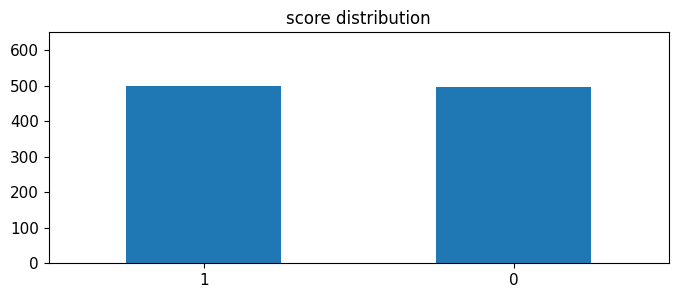

In [17]:
print(X_df.score.value_counts())

# plot barchart for X
X_df.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### feature creation

In [18]:
import nltk

In [19]:
# takes a like a minute or two to process
X_df['unigrams'] = X_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
X_df[0:4]['unigrams']

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [20]:
X_df

,sentence,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."
...,...,...,...
995,I just got bored watching Jessice Lange take h...,0,"[I, just, got, bored, watching, Jessice, Lange..."
996,"Unfortunately, any virtue in this film's produ...",0,"[Unfortunately, ,, any, virtue, in, this, film..."
997,"In a word, it is embarrassing.",0,"[In, a, word, ,, it, is, embarrassing, .]"
998,Exceptionally bad!,0,"[Exceptionally, bad, !]"


### feature subset selection

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_df.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 2771)	3
  (0, 2313)	1
  (0, 1674)	1
  (0, 60)	1
  (0, 1672)	1
  (0, 6)	1
  (0, 697)	1
  (0, 735)	1
  (0, 2933)	1
  (0, 1565)	1


In [22]:
analyze = count_vect.build_analyzer()
analyze(X_df.sentence[0])

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [23]:
count_vect.get_feature_names_out()[0:10]

array(['25', '8pm', '95', 'aailiyah', 'abandoned', 'ability', 'about',
       'above', 'absolutely', 'abstruse'], dtype=object)

In [24]:
X_counts.shape

(993, 2943)

In [25]:
X_counts[0:5, 0:100].toarray()


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 3,

In [26]:
import numpy as np
# find the 1 indicate above
#  reduce the number
X_counts[2, 0:100].toarray()
#for loop to fi(nd the '1'
for i in range(100):
    if(X_counts[2, i] == 1):
        print(count_vect.get_feature_names_out()[i])


acting
almost
angles


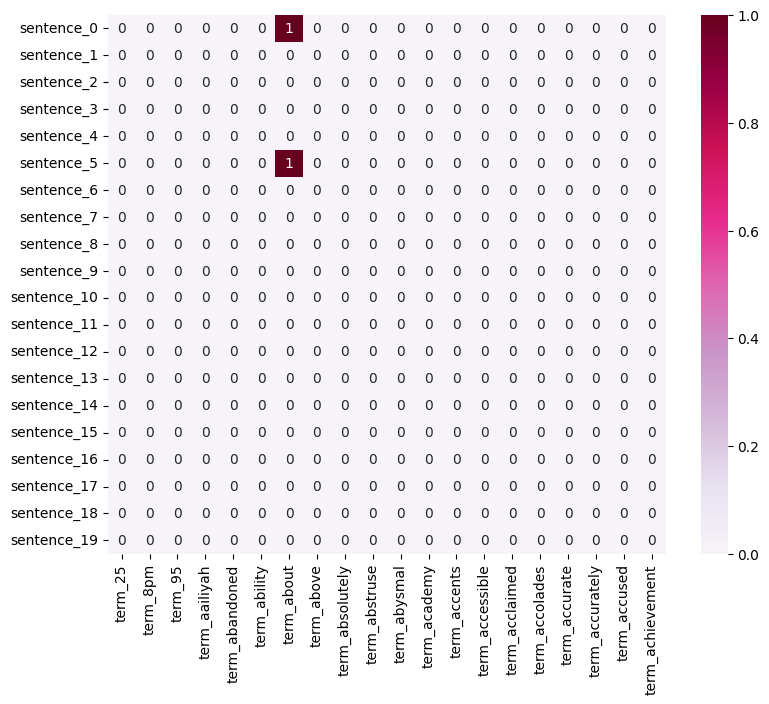

In [27]:
# mapping first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["sentence_"+ str(i) for i in list(X_df.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

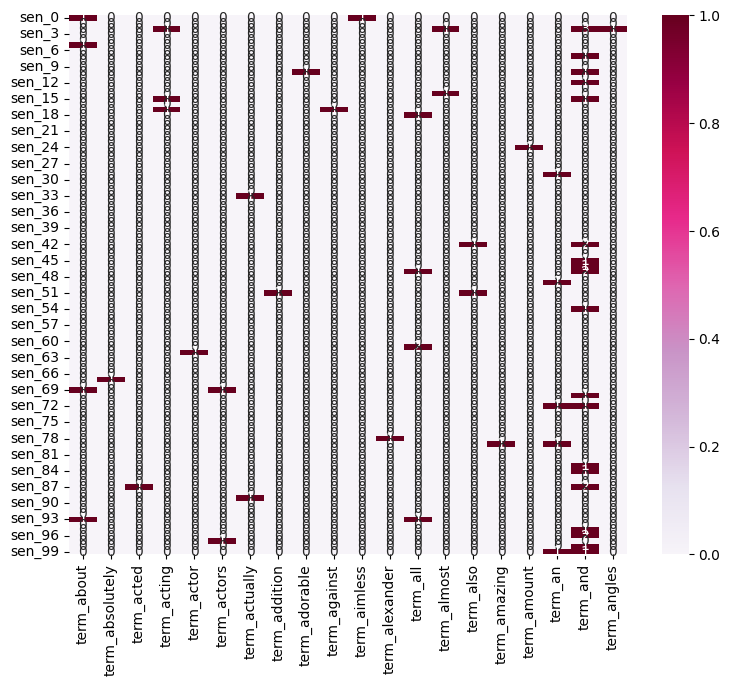

In [28]:
# take 100,100 as example 
# 1. because there are so many words, abandon the words that are never used.
# draw take more time than scan the words.
idx = np.argwhere(np.all( X_counts[0:100,0:100].toarray()== 0, axis=0)) 
a = np.delete(X_counts[0:100,0:100].toarray(), idx, axis = 1)
b = np.delete(count_vect.get_feature_names_out()[0:100], idx)

plot_x = ["term_"+str(i) for i in b[:]]

# obtain document index
plot_y = ["sen_"+ str(i) for i in list(X_df.index)[0:100]]

plot_z = a[:, :]
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### dimensionality reduction

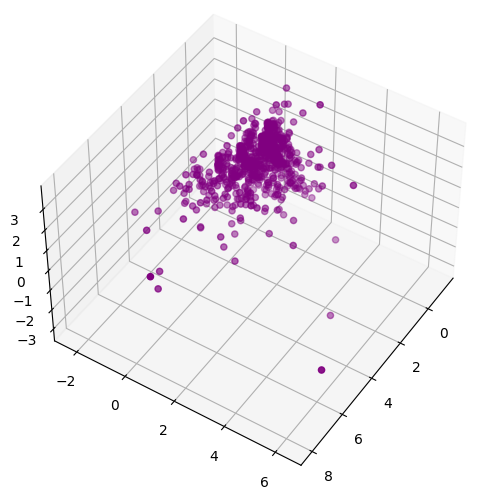

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_reduced_ = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = X_reduced_.T[0]
sequence_containing_y_vals = X_reduced_.T[1]
sequence_containing_z_vals = X_reduced_.T[2]

ax.view_init(elev=46, azim=33)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,c = 'purple') # NTHU 's purple
plt.show()

### interactive visualization

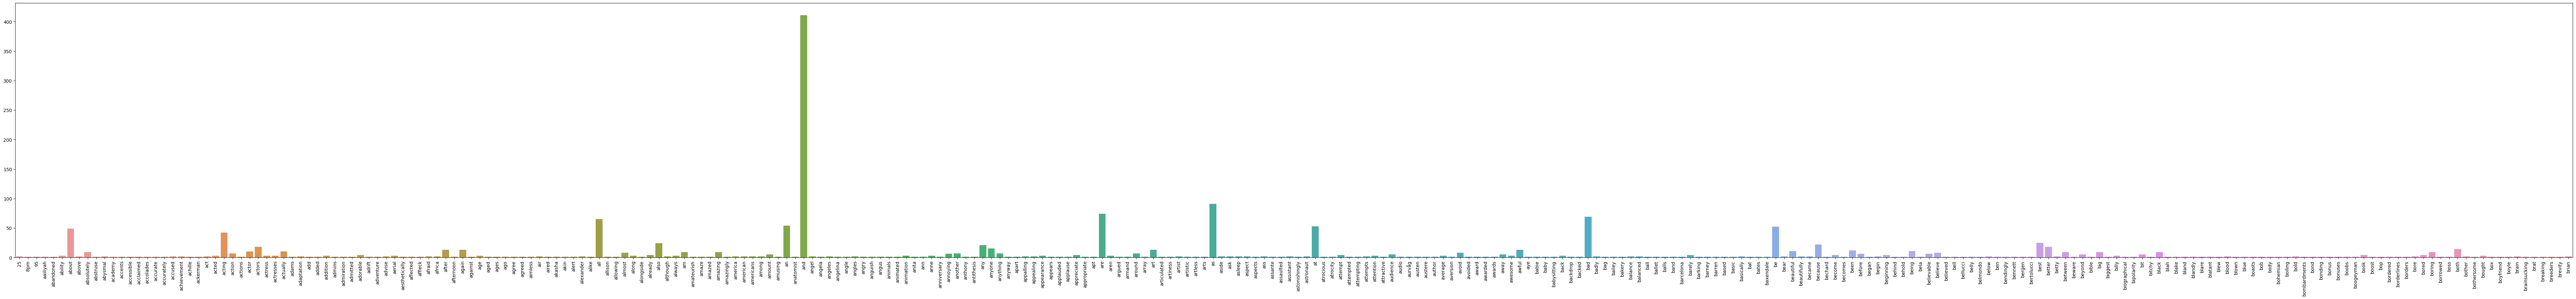

In [30]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
#for j in range(0,X_counts.shape[1]):
for j in range(0,300):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


In [31]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[0:300], 
            y=term_frequencies[:300])],
)
fig

[Text(0, 0, '25'),
 Text(1, 0, 'ability'),
 Text(2, 0, 'about'),
 Text(3, 0, 'above'),
 Text(4, 0, 'absolutely'),
 Text(5, 0, 'abysmal'),
 Text(6, 0, 'accused'),
 Text(7, 0, 'achievement'),
 Text(8, 0, 'act'),
 Text(9, 0, 'acted'),
 Text(10, 0, 'acting'),
 Text(11, 0, 'action'),
 Text(12, 0, 'actor'),
 Text(13, 0, 'actors'),
 Text(14, 0, 'actress'),
 Text(15, 0, 'actresses'),
 Text(16, 0, 'actually'),
 Text(17, 0, 'adaptation'),
 Text(18, 0, 'addition'),
 Text(19, 0, 'adorable'),
 Text(20, 0, 'advise'),
 Text(21, 0, 'aerial'),
 Text(22, 0, 'afraid'),
 Text(23, 0, 'africa'),
 Text(24, 0, 'after'),
 Text(25, 0, 'again'),
 Text(26, 0, 'age'),
 Text(27, 0, 'air'),
 Text(28, 0, 'alexander'),
 Text(29, 0, 'all'),
 Text(30, 0, 'almost'),
 Text(31, 0, 'along'),
 Text(32, 0, 'already'),
 Text(33, 0, 'also'),
 Text(34, 0, 'although'),
 Text(35, 0, 'always'),
 Text(36, 0, 'am'),
 Text(37, 0, 'amazing'),
 Text(38, 0, 'america'),
 Text(39, 0, 'american'),
 Text(40, 0, 'americans'),
 Text(41, 0, 'am

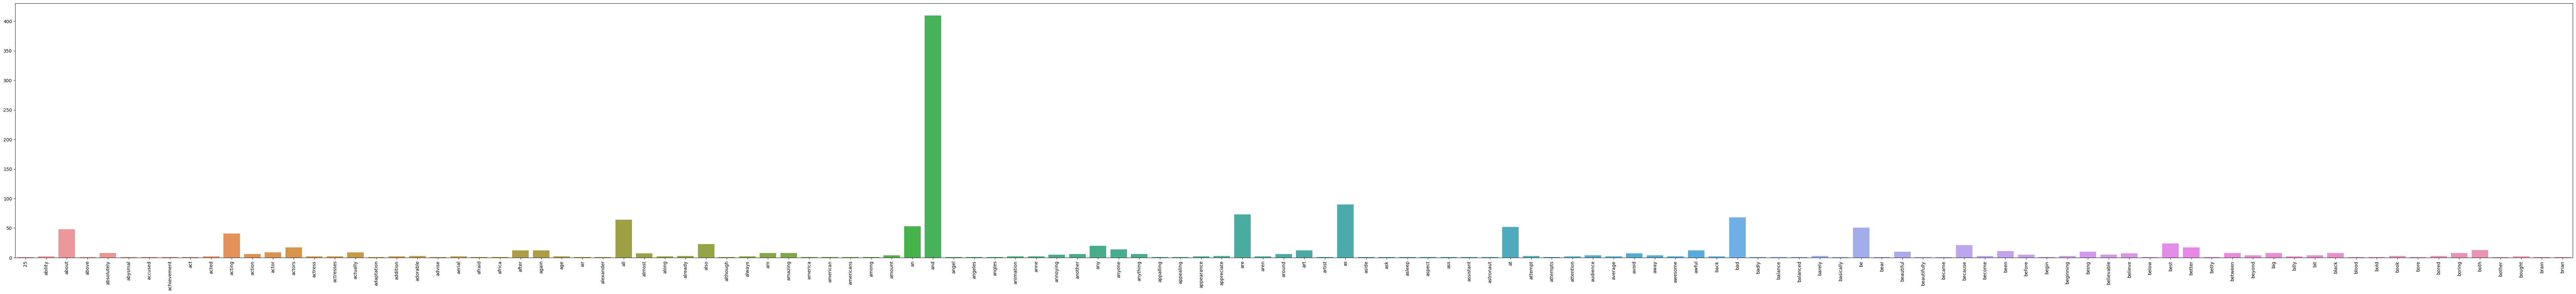

In [32]:
# reduction
term_frequencies_shift =  term_frequencies[:300] - 1
count_vect_new = []
term_frequencies_new = [] 
for vect , freq in zip(count_vect.get_feature_names_out()[:300],term_frequencies_shift):  
    if freq > 0:
        count_vect_new.append(vect)
        term_frequencies_new.append(freq)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new, 
            y=term_frequencies_new)
g.set_xticklabels(count_vect_new, rotation = 90)

[Text(0, 0, 'and'),
 Text(1, 0, 'as'),
 Text(2, 0, 'are'),
 Text(3, 0, 'bad'),
 Text(4, 0, 'all'),
 Text(5, 0, 'an'),
 Text(6, 0, 'at'),
 Text(7, 0, 'be'),
 Text(8, 0, 'about'),
 Text(9, 0, 'acting'),
 Text(10, 0, 'best'),
 Text(11, 0, 'also'),
 Text(12, 0, 'because'),
 Text(13, 0, 'any'),
 Text(14, 0, 'actors'),
 Text(15, 0, 'better'),
 Text(16, 0, 'anyone'),
 Text(17, 0, 'both'),
 Text(18, 0, 'after'),
 Text(19, 0, 'awful'),
 Text(20, 0, 'again'),
 Text(21, 0, 'art'),
 Text(22, 0, 'been'),
 Text(23, 0, 'beautiful'),
 Text(24, 0, 'being'),
 Text(25, 0, 'actually'),
 Text(26, 0, 'actor'),
 Text(27, 0, 'between'),
 Text(28, 0, 'absolutely'),
 Text(29, 0, 'black'),
 Text(30, 0, 'big'),
 Text(31, 0, 'boring'),
 Text(32, 0, 'am'),
 Text(33, 0, 'amazing'),
 Text(34, 0, 'avoid'),
 Text(35, 0, 'almost'),
 Text(36, 0, 'believe'),
 Text(37, 0, 'anything'),
 Text(38, 0, 'action'),
 Text(39, 0, 'around'),
 Text(40, 0, 'another'),
 Text(41, 0, 'believable'),
 Text(42, 0, 'before'),
 Text(43, 0, 'a

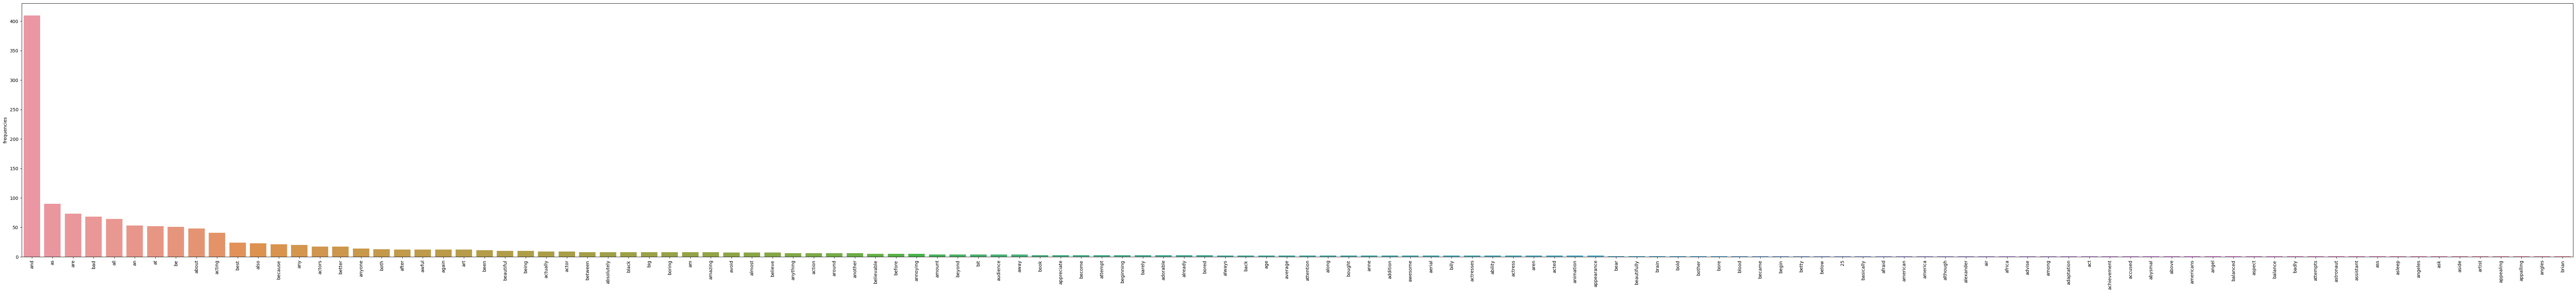

In [33]:
# sorted
new_dataframe = pd.DataFrame(term_frequencies_new,
            index = count_vect_new,
            columns=['frequencies'])
new_dataframe = new_dataframe.sort_values(by = ['frequencies'],ascending=False)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_dataframe.index, 
            y=new_dataframe["frequencies"])
g.set_xticklabels(new_dataframe.index, rotation = 90)

### visualization 

In [34]:
count_vect.get_feature_names_out()

array(['25', '8pm', '95', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [35]:
new_dataframe['probability'] = pd.to_numeric(term_frequencies_new) / len(term_frequencies_new)

In [36]:
new_dataframe

,frequencies,probability
and,410,0.008065
as,90,0.016129
are,73,0.387097
bad,68,0.008065
all,64,0.064516
...,...,...
artist,1,0.104839
appealing,1,0.008065
appalling,1,0.016129
angles,1,0.008065


[Text(0, 0, 'amount'),
 Text(1, 0, 'bought'),
 Text(2, 0, 'back'),
 Text(3, 0, 'blood'),
 Text(4, 0, 'black'),
 Text(5, 0, 'annoying'),
 Text(6, 0, 'actress'),
 Text(7, 0, 'basically'),
 Text(8, 0, 'are'),
 Text(9, 0, 'best'),
 Text(10, 0, 'above'),
 Text(11, 0, 'amazing'),
 Text(12, 0, 'alexander'),
 Text(13, 0, 'attempt'),
 Text(14, 0, 'any'),
 Text(15, 0, 'americans'),
 Text(16, 0, 'beginning'),
 Text(17, 0, 'artist'),
 Text(18, 0, 'being'),
 Text(19, 0, 'bother'),
 Text(20, 0, 'actually'),
 Text(21, 0, 'attention'),
 Text(22, 0, 'africa'),
 Text(23, 0, 'american'),
 Text(24, 0, 'act'),
 Text(25, 0, 'anyone'),
 Text(26, 0, 'because'),
 Text(27, 0, 'balanced'),
 Text(28, 0, 'all'),
 Text(29, 0, 'astronaut'),
 Text(30, 0, 'balance'),
 Text(31, 0, 'aside'),
 Text(32, 0, 'believe'),
 Text(33, 0, 'anything'),
 Text(34, 0, 'beautifully'),
 Text(35, 0, 'big'),
 Text(36, 0, 'accused'),
 Text(37, 0, 'barely'),
 Text(38, 0, 'also'),
 Text(39, 0, 'average'),
 Text(40, 0, 'become'),
 Text(41, 0

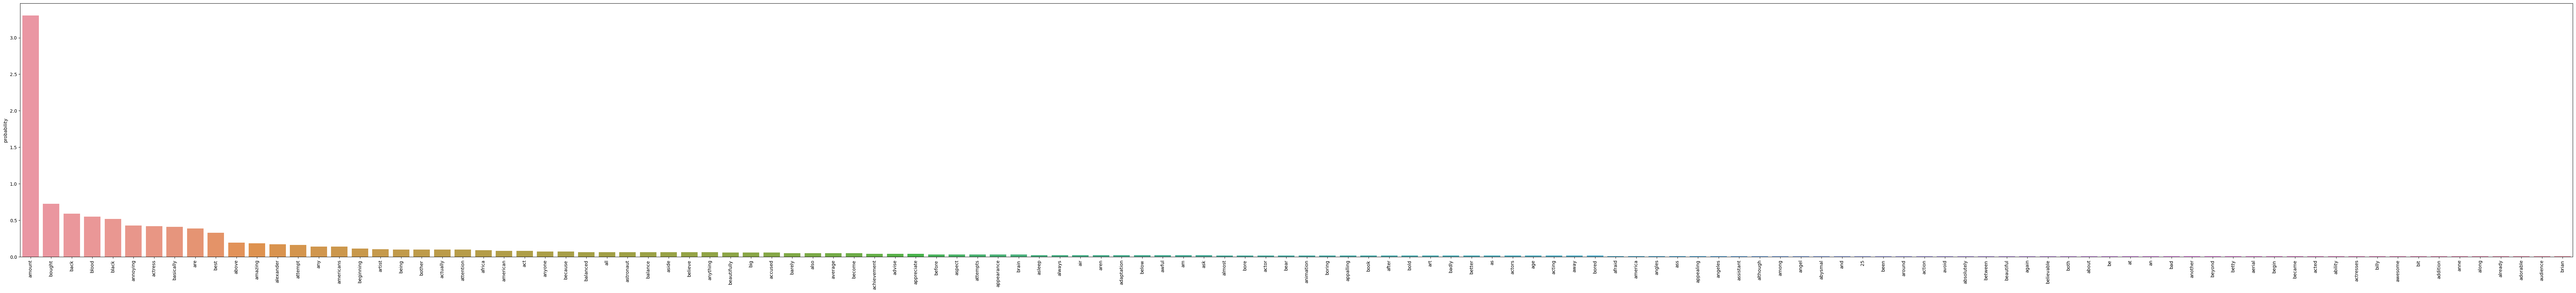

In [37]:
new_dataframe = new_dataframe.sort_values(by = ['probability'],ascending=False)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_dataframe.index, 
            y=new_dataframe["probability"])
g.set_xticklabels(new_dataframe.index, rotation = 90)

### Generate TF-IDF features

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_df.sentence)


<993x2943 sparse matrix of type '<class 'numpy.float64'>'
	with 12202 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_df.sentence)
vectorizer.get_feature_names_out()


array(['25', '8pm', '95', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [40]:
count_vect.get_feature_names_out()[0:300]

array(['25', '8pm', '95', 'aailiyah', 'abandoned', 'ability', 'about',
       'above', 'absolutely', 'abstruse', 'abysmal', 'academy', 'accents',
       'accessible', 'acclaimed', 'accolades', 'accurate', 'accurately',
       'accused', 'achievement', 'achille', 'ackerman', 'act', 'acted',
       'acting', 'action', 'actions', 'actor', 'actors', 'actress',
       'actresses', 'actually', 'adams', 'adaptation', 'add', 'added',
       'addition', 'admins', 'admiration', 'admitted', 'adorable',
       'adrift', 'adventure', 'advise', 'aerial', 'aesthetically',
       'affected', 'affleck', 'afraid', 'africa', 'after', 'afternoon',
       'again', 'against', 'age', 'aged', 'ages', 'ago', 'agree',
       'agreed', 'aimless', 'air', 'aired', 'akasha', 'akin', 'alert',
       'alexander', 'alike', 'all', 'allison', 'allowing', 'almost',
       'along', 'alongside', 'already', 'also', 'although', 'always',
       'am', 'amateurish', 'amaze', 'amazed', 'amazing', 'amazingly',
       'america', 

In [41]:
X.toarray()[0][0:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19155325, 0.        , 0.        , 0.        ])

In [42]:
X_counts.toarray()[0][0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Naive Bayes classifier 

In [43]:
X.toarray()[0][0:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19155325, 0.        , 0.        , 0.        ])

In [44]:
X_counts.toarray()[:, :-1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
len(X_counts.toarray()[:,6 ])

993

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_counts.toarray()[:, :-1], X_counts.toarray()[:,6 ], test_size=0.25,random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
ans = gnb.predict(X_counts.toarray()[:, :-1])
ans

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_counts.toarray()[:, :-1], X_df.score, test_size=0.25,random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
ans = gnb.predict(X_counts.toarray()[:, :-1])
ans

array(['0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X.toarray()[:, :-1], X_df.score, test_size=0.25,random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
ans = gnb.predict(X_counts.toarray()[:, :-1])
ans

array(['0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0